Морфологический анализ <br/>
Домашнее задание 2 <br/>
**Голев Александр 135М**

# Подобрать последовательность операций математической морфологии (наращива-ние, эрозия) и их параметры 
Для обработки пары изображений на рис. с целью подавления шума и сравнить квадратичное отклонение результатов обработки с обработкой

**I. фильтром «скользящее среднее»;**

На верхнем изображении в паре (суффикс sp) шум — «соль и перец»</br>
На нижнем изображении в паре (суффикс crc) аналогичным образом выбираются центры кру-
гов диаметром 3 пикселя, внутри которых пиксели также заменяются на белые или черные.

In [1]:
import cv2
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Загружаем изображение
true_image = cv2.imread('text-d-true.png')
sp_image = cv2.imread('text-d-sp.png')
crc_image = cv2.imread('text-d-crc.png')

In [3]:
def showOneLine(images, texts, dim = 3):
    plt.figure(figsize=(28, 16))
    length = len(images)
    for i, (image, text) in enumerate(zip(images, texts)):
        plt.subplot(length//dim+1, dim, i+1)
        plt.title(text)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    

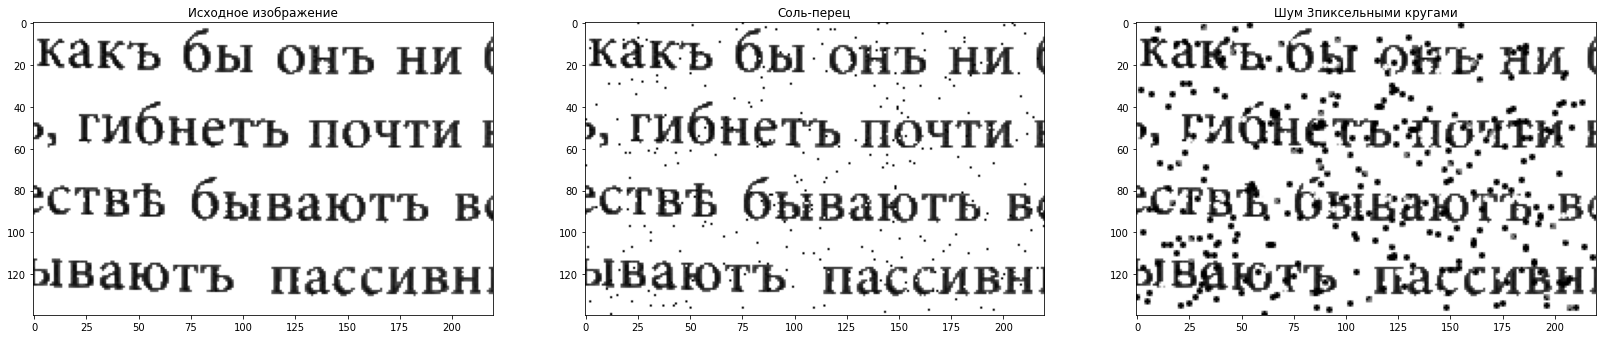

In [4]:
showOneLine([true_image,sp_image,crc_image],['Исходное изображение','Соль-перец', 'Шум 3пиксельными кругами'])

## Бинаризация

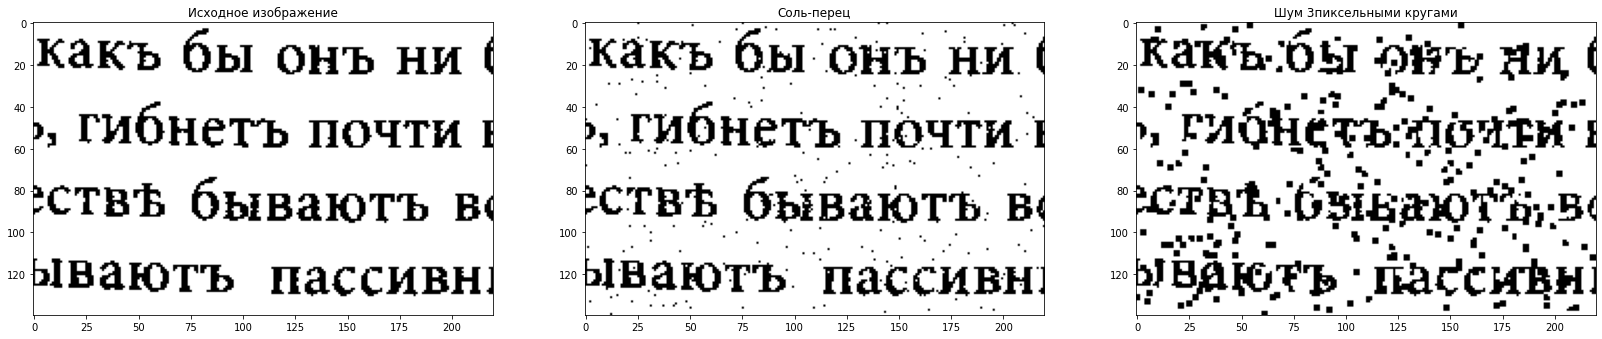

In [5]:
_, true_binary = cv2.threshold(true_image, 128, 255, cv2.THRESH_BINARY)
_, sp_binary = cv2.threshold(sp_image, 128, 255, cv2.THRESH_BINARY)
_, crc_binary = cv2.threshold(crc_image, 128, 255, cv2.THRESH_BINARY)
showOneLine([true_binary,sp_binary,crc_binary],['Исходное изображение','Соль-перец', 'Шум 3пиксельными кругами'])

## Эрозия + Наращивание

In [6]:
def mseImages(image1, image2):
    difference_1 = cv2.subtract(image2, image1)/255
    difference_2 = cv2.subtract(image1, image2)/255

    squared_difference = np.square(difference_1)

    # Вычислите среднее квадратичное отклонение (MSE)
    return np.mean((np.square(difference_1)+ np.square(difference_2))/2, dtype= np.float64)

In [24]:
def comboDilate(image, kernel_x,kernel_y):
    d_x = cv2.dilate(image, kernel_x, iterations=1)
    d_y = cv2.dilate(image, kernel_y, iterations=1)
    d_comb = ((d_y.astype(np.uint16) + d_x.astype(np.uint16)) /2).astype(np.uint8)
    return d_x, d_y, d_comb

sp_dilated_x - 0.020925324675324677
sp_dilated_x_erosed - 0.02944805194805195
sp_dilated_y - 0.019366883116883116
sp_dilated_comb - 0.012825964788767557
sp_dilated__comb_x2 - 0.027772791184209868
sp_dilated - 0.03912337662337662
sp_dilated_erode - 0.055113636363636365


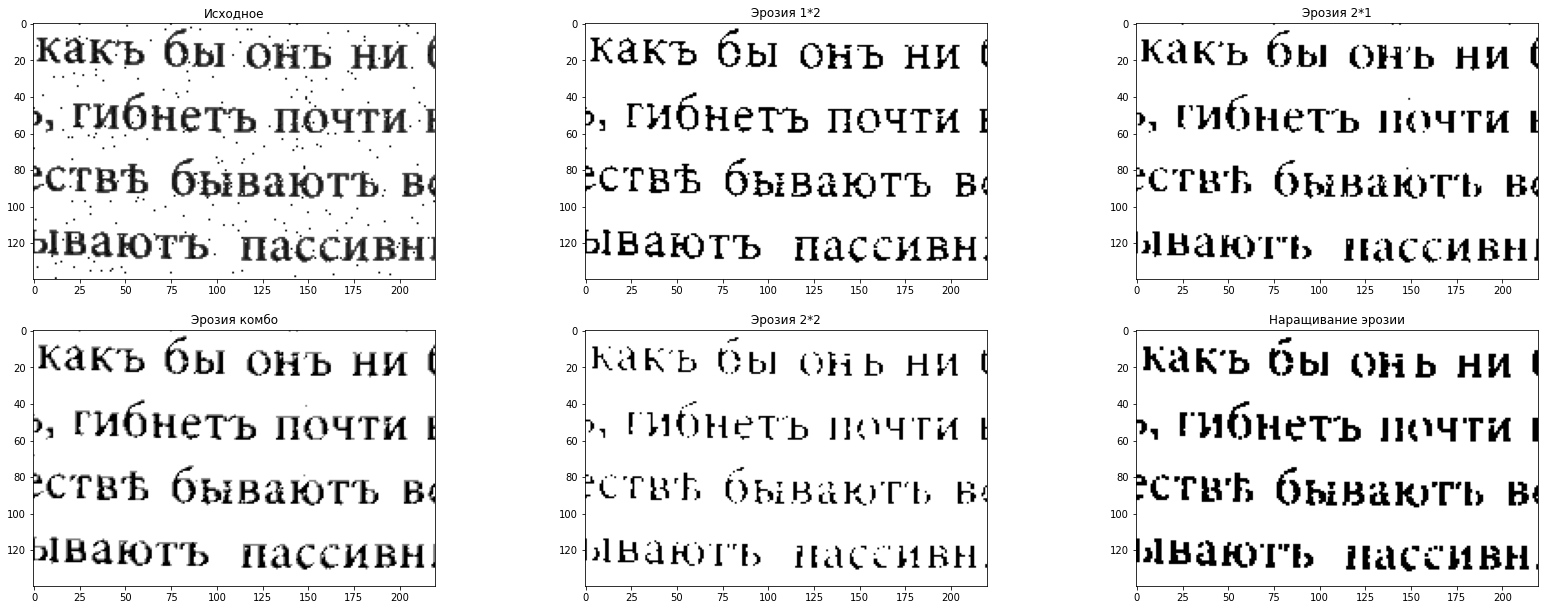

In [25]:
# Определим структурный элемент (ядро) для эрозии
kernel_x = np.ones((1, 2), np.uint8) 
kernel_y = np.ones((2, 1), np.uint8) 
kernel = np.ones((2, 2), np.uint8) 
# Применим операцию эрозии
#sp_erode = cv2.erode(sp_binary, kernel, iterations=1)
# Применим операцию наращивания
sp_dilated_x, sp_dilated_y,sp_dilated_comb  =comboDilate(sp_binary, kernel_x, kernel_y)
print('sp_dilated_x -',mseImages(true_binary, sp_dilated_x))
print('sp_dilated_x_erosed -',mseImages(true_binary, cv2.erode(sp_dilated_x, kernel_y, iterations=1)))
print('sp_dilated_y -',mseImages(true_binary, sp_dilated_y))
print('sp_dilated_comb -',mseImages(true_binary, sp_dilated_comb))
x,y,z = comboDilate(sp_dilated_comb, kernel_x, kernel_y)
print('sp_dilated__comb_x2 -',mseImages(true_binary, z))

sp_dilated = cv2.dilate(sp_binary, kernel, iterations=1)
print('sp_dilated -',mseImages(true_binary, sp_dilated))

sp_dilated_erode = cv2.erode(sp_dilated, kernel, iterations=1)
print('sp_dilated_erode -',mseImages(true_binary, sp_dilated_erode))

showOneLine([sp_image, sp_dilated_x, sp_dilated_y, sp_dilated_comb, sp_dilated,sp_dilated_erode],['Исходное','Эрозия 1*2','Эрозия 2*1','Эрозия комбо', 'Эрозия 2*2','Наращивание эрозии'])

### Круги

crc_dilated_x - 0.05949675324675325
crc_dilated_y - 0.04668831168831169
crc_dilated_comb - 0.0364448051948052
crc_dilated - 0.06836038961038961
crc_dilated_erosed 0.039756493506493504


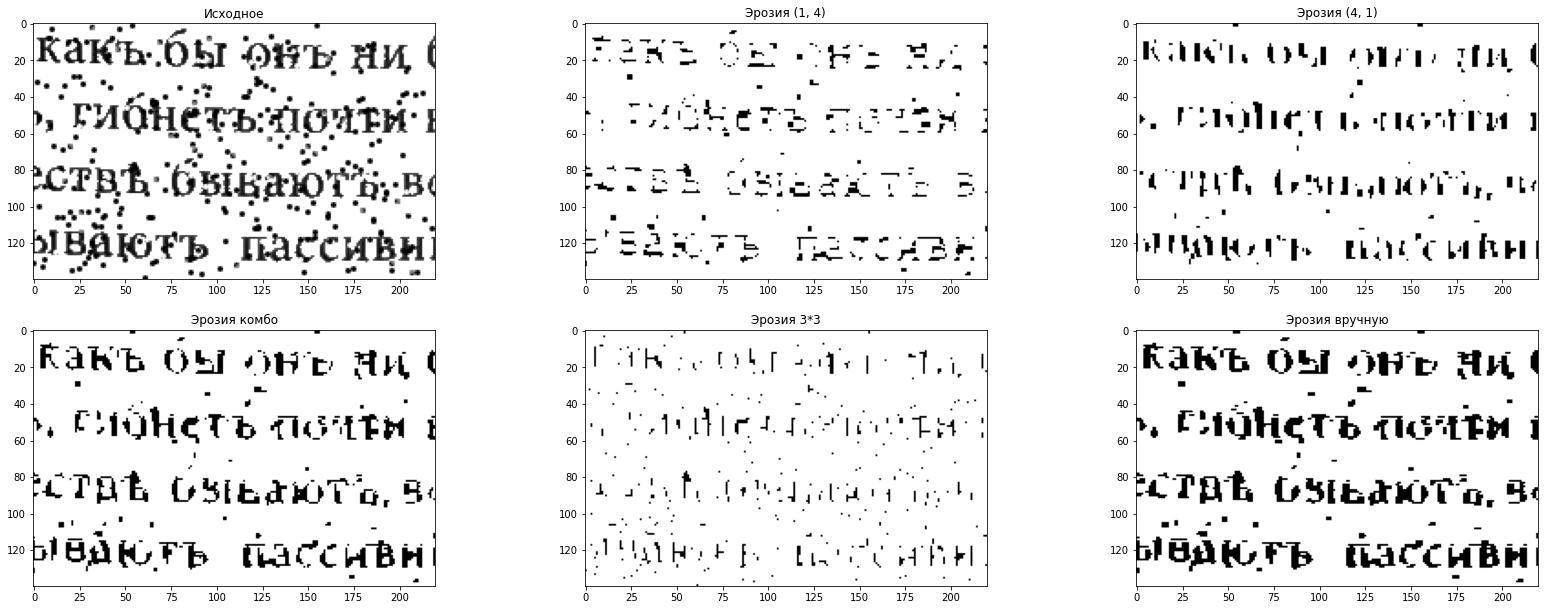

In [9]:
crc_kernel_x = np.ones((1, 4), np.uint8) 
crc_kernel_y = np.ones((4, 1), np.uint8)
crc_own_kernel = np.ones((1,2), np.uint8)
crc_kernel = np.ones((3,3), np.uint8) 


# Применим операцию эрозии
#sp_erode = cv2.erode(sp_binary, kernel, iterations=1)
# Применим операцию наращивания
crc_dilated_x, crc_dilated_y,crc_dilated_comb  = comboDilate(crc_binary, crc_kernel_x, crc_kernel_y)
print('crc_dilated_x -',mseImages(true_binary, crc_dilated_x))
print('crc_dilated_y -',mseImages(true_binary, crc_dilated_y))
print('crc_dilated_comb -',mseImages(true_binary, crc_dilated_comb))

crc_dilated = cv2.dilate(crc_binary, crc_kernel, iterations=1)
print('crc_dilated -',mseImages(true_binary, crc_dilated))

crc_dilated_erosed = cv2.erode(crc_dilated_comb, crc_own_kernel, iterations=1)
print('crc_dilated_erosed',mseImages(true_binary, crc_dilated_erosed))


showOneLine([crc_image, crc_dilated_x, crc_dilated_y, crc_dilated_comb, crc_dilated,crc_dilated_erosed],['Исходное',f'Эрозия {crc_kernel_x.shape}',f'Эрозия {crc_kernel_y.shape}','Эрозия комбо', 'Эрозия 3*3','Эрозия вручную'])

## Сравнение со скользящим средним

sp_dilated_comb - 0.005957792207792208
sp_smoothed_image - 0.016382227365099335
sp_smoothed_image_b - 0.01133116883116883
crc_dilated_comb - 0.0364448051948052
crc_smoothed_image - 0.022371136475980765
crc_smoothed_image_b - 0.04623376623376623


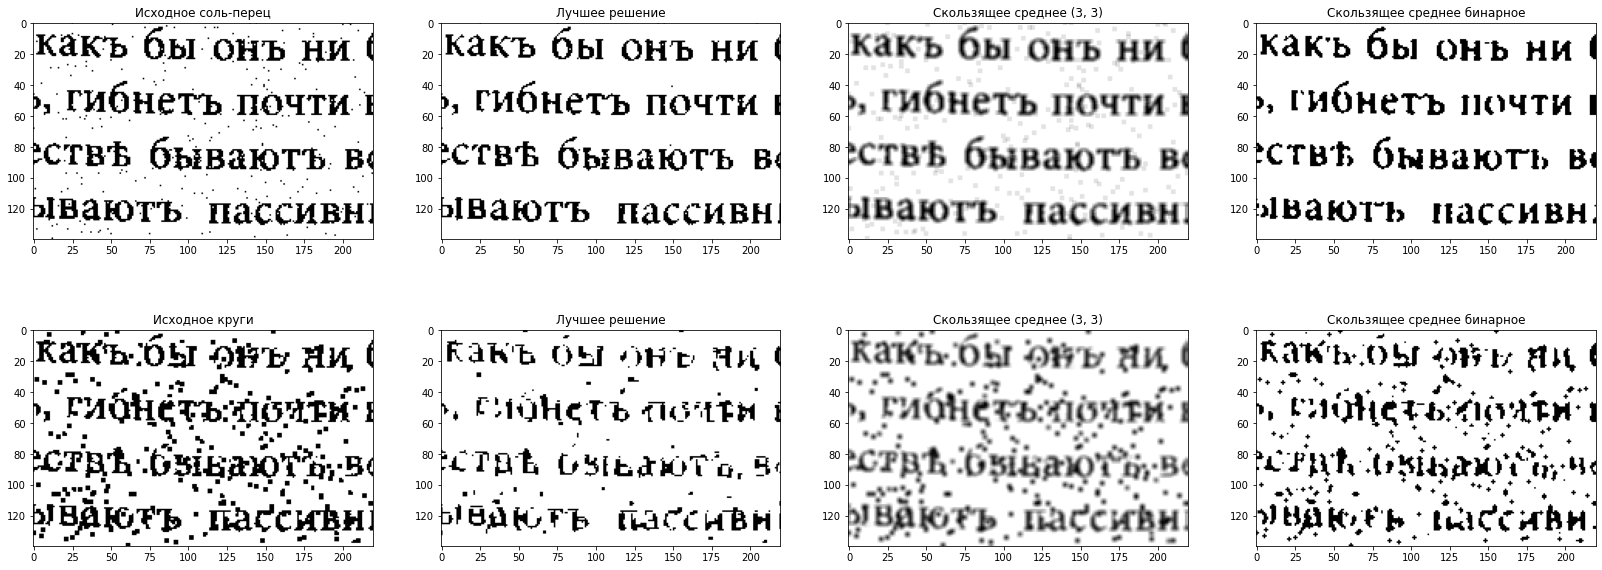

In [10]:
kernel_size = (3, 3)

# Примените фильтрацию скользящим средним
sp_smoothed_image = cv2.blur(sp_binary, kernel_size)
print('sp_dilated_comb -',mseImages(true_binary, sp_dilated_comb))
print('sp_smoothed_image -',mseImages(true_binary, sp_smoothed_image))
_, sp_smoothed_image_b = cv2.threshold(sp_smoothed_image, 128, 255, cv2.THRESH_BINARY)
print('sp_smoothed_image_b -',mseImages(true_binary, sp_smoothed_image_b))


kernel_size_2 = (3, 3)

crc_smoothed_image = cv2.blur(crc_image, kernel_size_2)
print('crc_dilated_comb -',mseImages(true_binary, crc_dilated_comb))
print('crc_smoothed_image -',mseImages(true_image, crc_smoothed_image))
_, crc_smoothed_image_b = cv2.threshold(crc_smoothed_image, 128, 255, cv2.THRESH_BINARY)
print('crc_smoothed_image_b -',mseImages(true_binary, crc_smoothed_image_b))

showOneLine([sp_binary, sp_dilated_comb, sp_smoothed_image,sp_smoothed_image_b, crc_binary, crc_dilated_comb,crc_smoothed_image,crc_smoothed_image_b],['Исходное соль-перец','Лучшее решение',f'Скользящее среднее {kernel_size}',f'Скользящее среднее бинарное','Исходное круги','Лучшее решение',f'Скользящее среднее {kernel_size_2}',f'Скользящее среднее бинарное'],dim=4)